<a href="https://colab.research.google.com/github/samchak18/Capstone_Project_2_Retail_Sales_Prediction/blob/main/Retail_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## Loading Libraries & Data

In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading Rossman Dataset
rossman_df= pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Retail Sales Prediction - Asim Siddiqui/Data/Rossmann Stores Data.csv', low_memory= False)

In [ ]:
#Loading Store Dataset
store_df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Retail Sales Prediction - Asim Siddiqui/Data/store.csv', low_memory= False)

## **Analysing the Rossman Dataset**

In [ ]:
rossman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
rossman_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


##### **Checking Information about Dataset**

In [ ]:
rossman_df.shape

(1017209, 9)

In [ ]:
#Checking info of data as data types and rows and cols
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
#Checking Null Values
rossman_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

**Summary Statastics Of Dataset**

In [ ]:
#Summary Statastics
rossman_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
#No. Of Stores in the Dataset
rossman_df.Store.nunique()

1115

In [ ]:
# Value_counts of StateHoliday Column
rossman_df.StateHoliday.value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
print(rossman_df['Date'].min(),'initial')
print(rossman_df['Date'].max(),'final')

2013-01-01 initial
2015-07-31 final


**This tells us we have a data of almost 3 years.**

In [ ]:
# extract year, month, day and week of year from "Date"

rossman_df['Date']=pd.to_datetime(rossman_df['Date'])
rossman_df['Year'] = rossman_df['Date'].apply(lambda x: x.year)
rossman_df['Month'] = rossman_df['Date'].apply(lambda x: x.month)
rossman_df['Day'] = rossman_df['Date'].apply(lambda x: x.day)
rossman_df['WeekOfYear'] = rossman_df['Date'].apply(lambda x: x.weekofyear)

In [ ]:
rossman_df.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])
rossman_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31


## **EDA On Rossman Dataset**

#### **Heatmap of the Rossman Dataset**

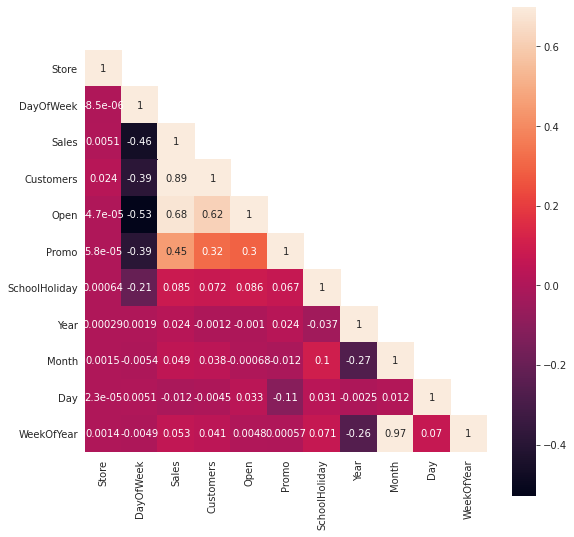

In [ ]:
correlation_map = rossman_df[rossman_df.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(9,9)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

**As we can see that in the graph given below that Stores mainly closed on Sunday**

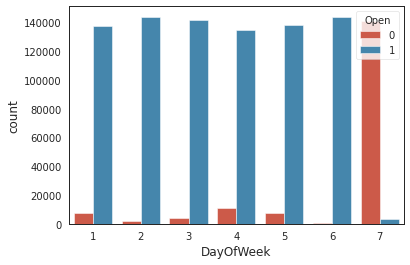

In [ ]:
sns.countplot(x='DayOfWeek',hue='Open',data=rossman_df)

**Sales Are nearly doubled High When Promo is Running**

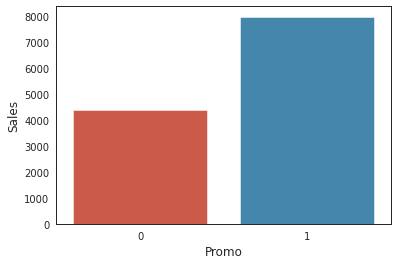

In [ ]:
#Impact of promo on sales
Promo_sales = pd.DataFrame(rossman_df.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])

**As We can see that In the month of November and Specially in December Sales is increasing Rapidly every year on the christmas eve.**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


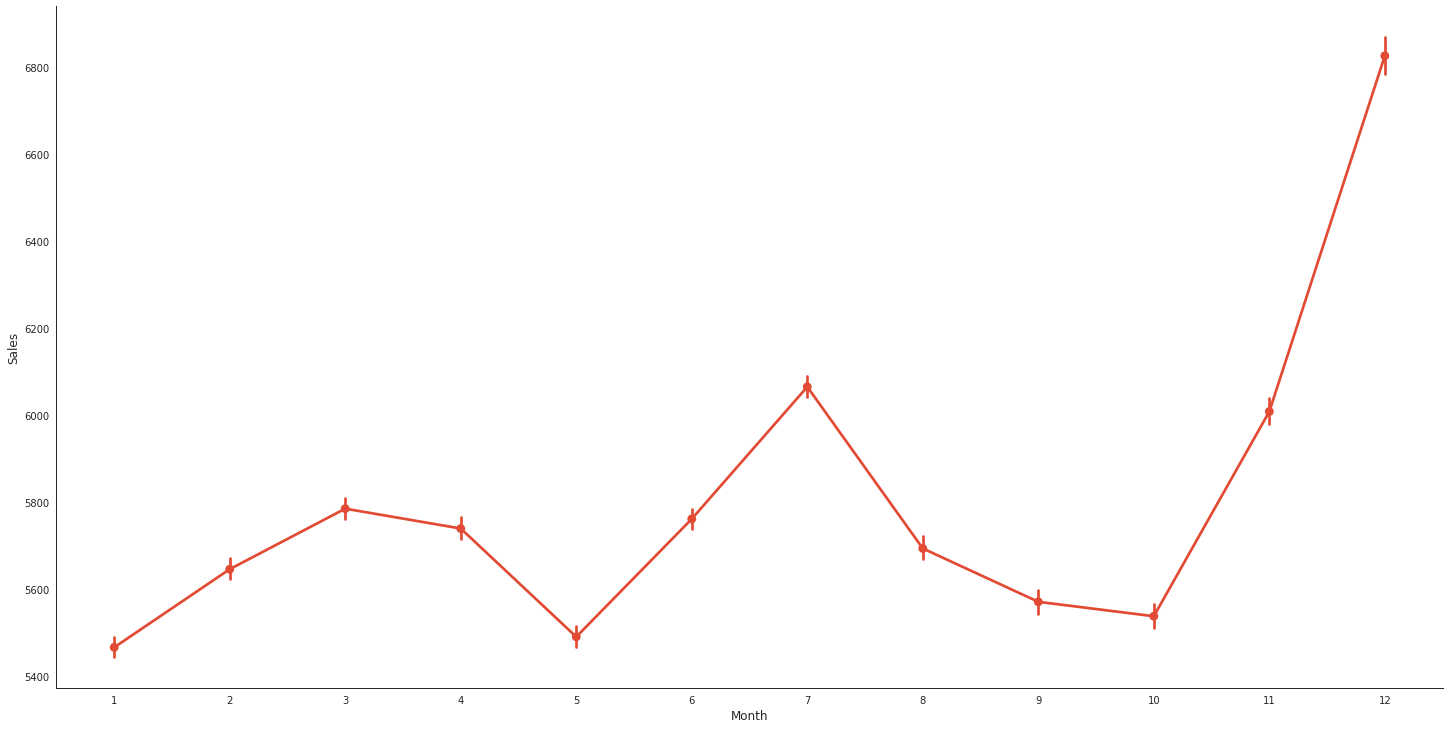

In [ ]:
sns.factorplot(x="Month" ,y = "Sales" , data=rossman_df, kind="point", aspect=2,size=10)

In [ ]:
# Value Counts of SchoolHoliday Column
rossman_df.SchoolHoliday.value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

**As we can see in the Piechart Sales affected by School Holiday is 18% and Mainly Sales aren't afffected by School Holiday**

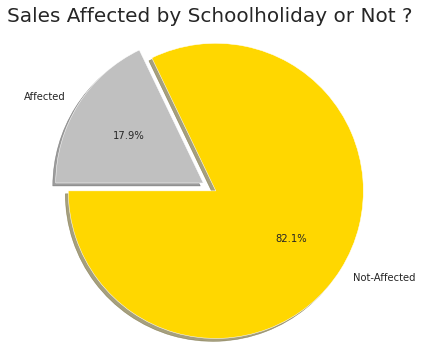

In [ ]:
labels = 'Not-Affected' , 'Affected'
sizes = rossman_df.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


### **Transforming Variable StateHoliday**

In [ ]:
rossman_df["StateHoliday"] = rossman_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

In [ ]:
rossman_df.StateHoliday.value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

**As we can see in the Piechart Sales affected by State Holiday is only 3% means Sales aren't afffected by State Holiday**

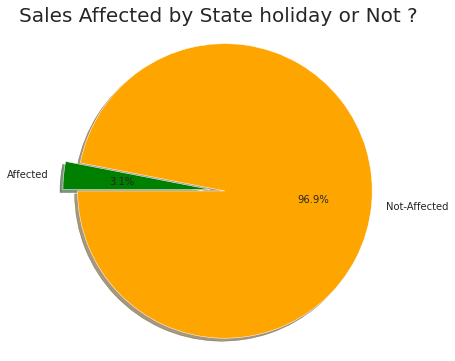

In [ ]:
labels = 'Not-Affected' , 'Affected'
sizes = rossman_df.StateHoliday.value_counts()
colors = ['orange','green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by State holiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

**As Sales isn't much affected by State Holiday so i'm removing this column**

In [ ]:
rossman_df.drop('StateHoliday',inplace=True,axis=1)

**Histogram Representation of Sales. Here 0 is showing because most of the time store was closed.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


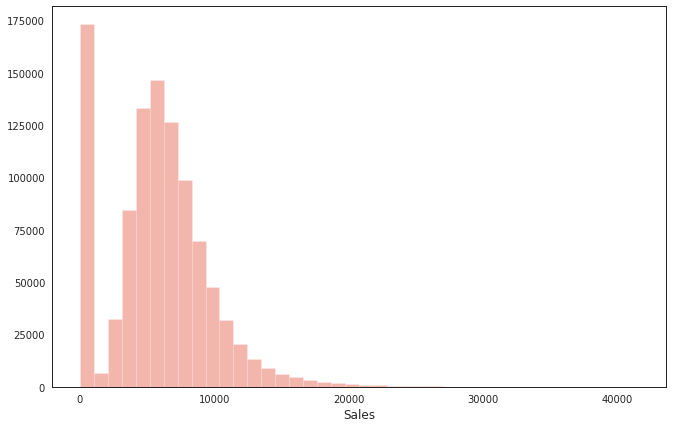

In [ ]:
#distribution of sales
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.distplot(rossman_df['Sales'], kde = False,bins=40);

**Sales vs Customers**

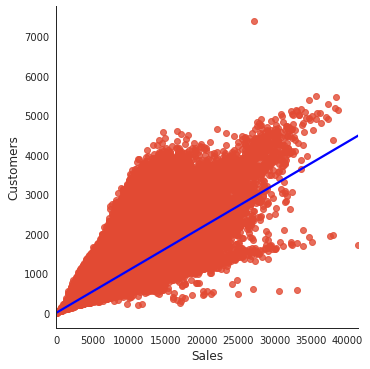

In [ ]:
#linear relation between sales and customers
sns.lmplot(x= 'Sales' , y ='Customers',data=rossman_df, palette='seismic', height=5,aspect=1, line_kws={'color':'blue'});

## **Analysing the Store Dataset**

In [ ]:
store_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


##### **Checking Information about Dataset**

In [ ]:
store_df.shape

(1115, 10)

In [ ]:
#Checking info of data as data types and rows and cols
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
#Checking Null Values
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

**Heatmap for null values**

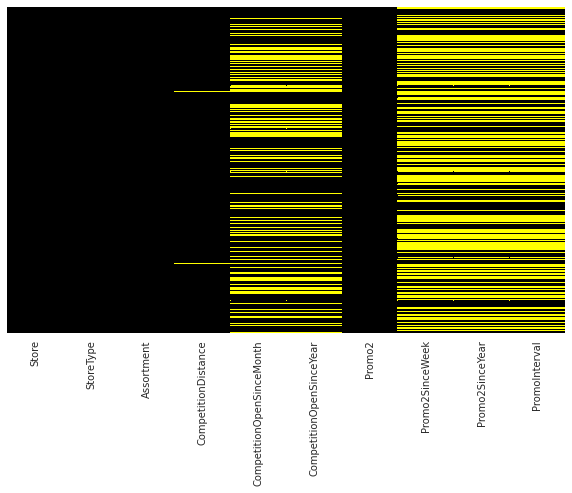

In [ ]:
# creating heatmap for null values
plt.figure(figsize=(10,6))
sns.heatmap(store_df.isnull(),yticklabels= False, cbar= False, cmap= 'gnuplot')

**Distribution Of Different Store Types**

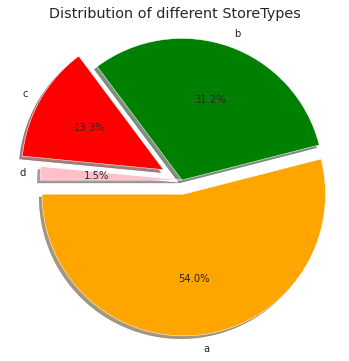

In [ ]:
labels = 'a' , 'b' , 'c' , 'd'
sizes = store_df.StoreType.value_counts()
colors = ['orange', 'green' , 'red' , 'pink']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


### **Remove features with high percentages of missing values**

#### **we can see that some features have a high percentage of missing values and they won't be accurate as indicators, so we will remove features with more than 30% missing values.**

In [ ]:
# remove features
store_df = store_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

#### **Replace missing values in features with low percentages of missing values**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distributin of Store Competition Distance')

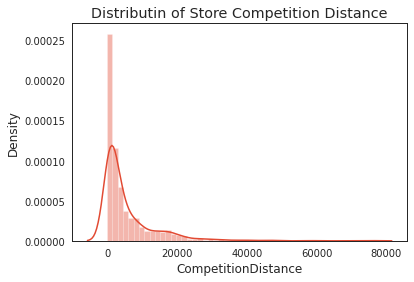

In [ ]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution

sns.distplot(store_df.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

#### **The distribution is right skewed, so we'll replace missing values with the median.**

In [ ]:
# replace missing values in CompetitionDistance with median for the store dataset

store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.median(), inplace=True)

**Pairplot for Store Dataset**

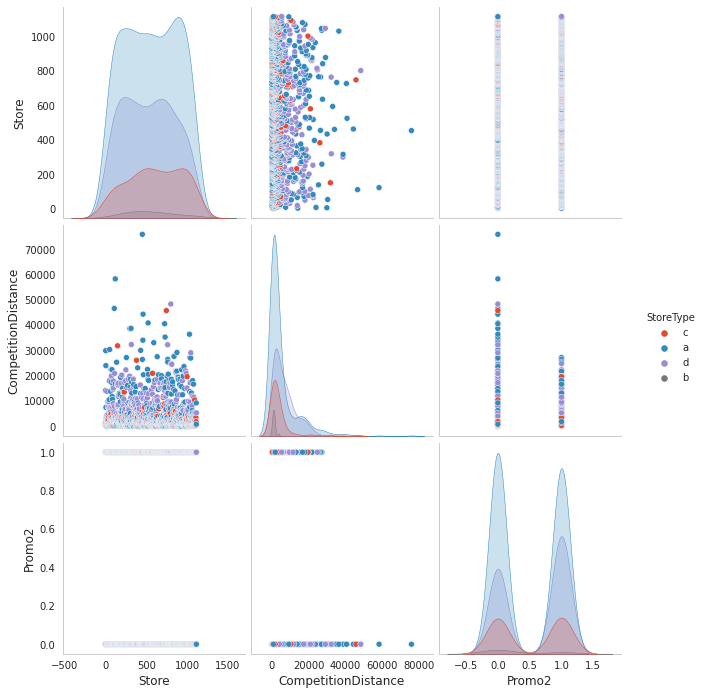

In [ ]:
#pairplot for store dataset
sns.set_style("whitegrid", {'axes.grid' : False})
pp=sns.pairplot(store_df,hue='StoreType')
pp.fig.set_size_inches(10,10);

**Checking stores with their assortment type**

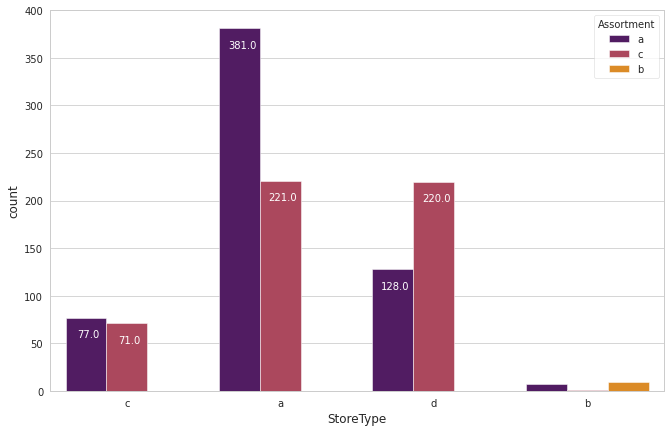

In [ ]:
#checking stores with their assortment type 
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=store_df,palette="inferno")

for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)

***We can see that there is not such significant differences in these 3 years in terms of sales.*** 

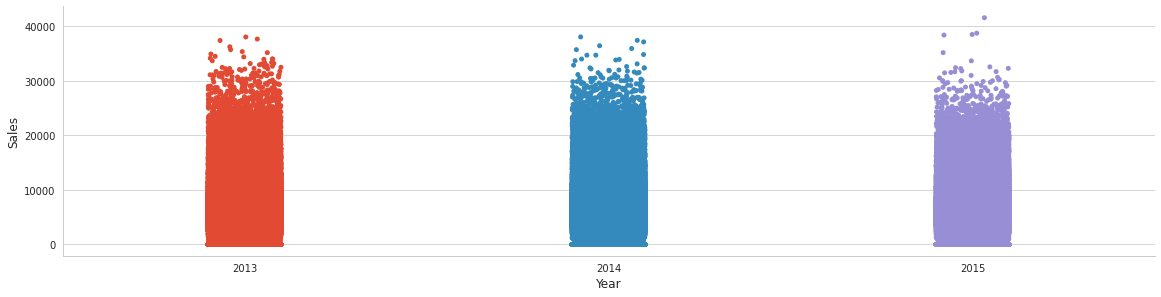

In [ ]:
#plotting year vs sales
sns.catplot(x='Year',y='Sales',data=rossman_df, height=4, aspect=4 );

### **Merging Two Datasets**

In [ ]:
df = pd.merge(rossman_df, store_df, how='left', on='Store')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,1,2015,7,31,31,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,1,2015,7,31,31,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,1,2015,7,31,31,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,1,2015,7,31,31,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,1,2015,7,31,31,a,a,29910.0,0


In [ ]:
df.shape

(1017209, 16)

## **EDA On Merged Dataset**

#### **Heatmap Of Merged Dataset**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

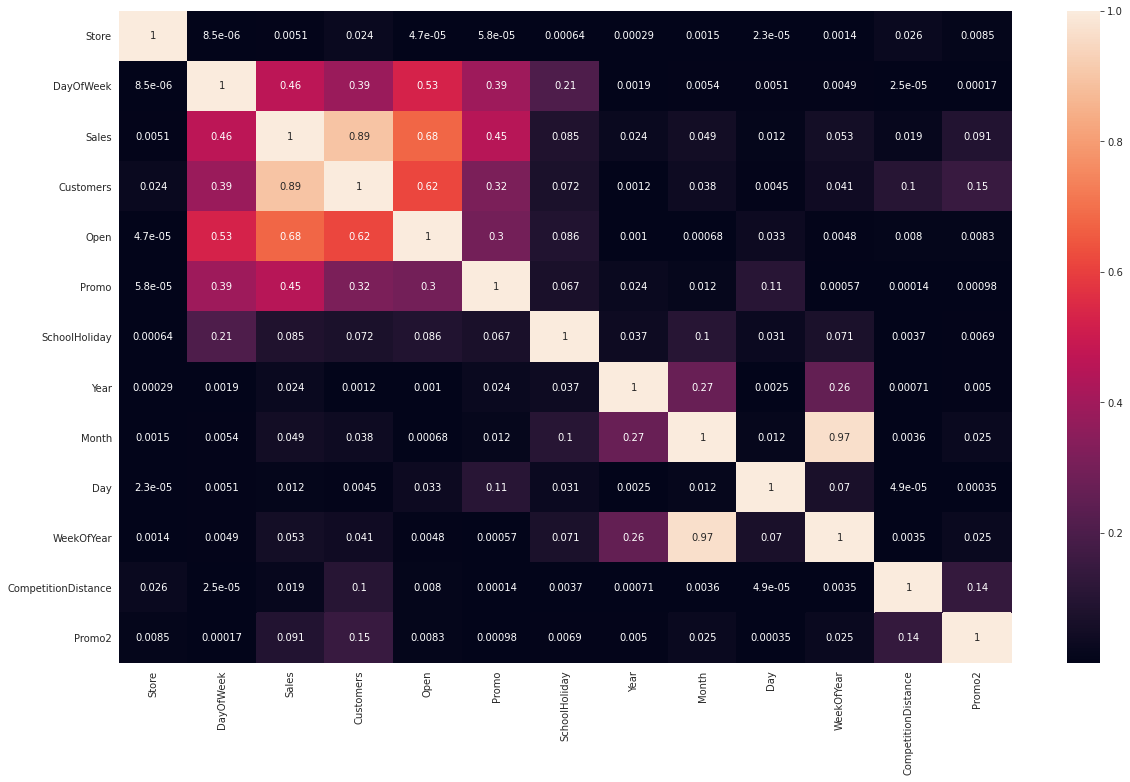

In [ ]:
plt.subplots(figsize=(20,12))
sns.heatmap(df.corr().abs(), annot=True)
plt.savefig("heatmap.png")

from google.colab import files
files.download('heatmap.png') # this line opens your documents in your pc to save your png

In [ ]:
df["Avg_Customer_Sales"] = df.Sales/df.Customers

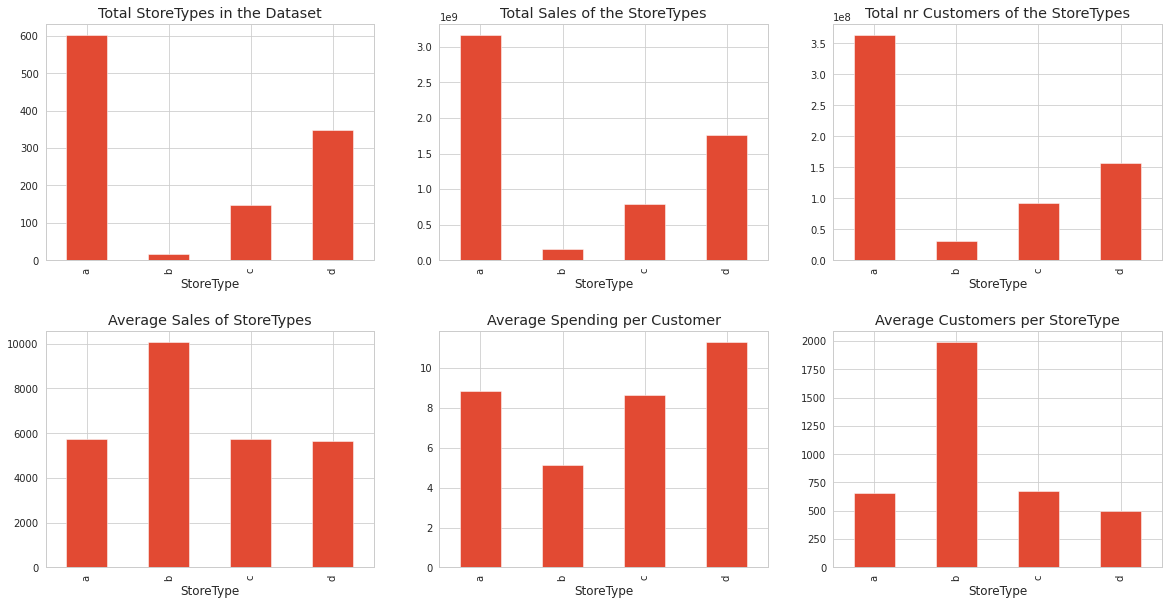

In [ ]:
f, ax = plt.subplots(2, 3, figsize = (20,10))

store_df.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")
df.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")
df.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes")
df.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")
df.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer")
df.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType")

plt.subplots_adjust(hspace = 0.3)
plt.show()

**As we can see from the graphs, the StoreType A has the most stores, sales and customers. However the StoreType D has the best averages spendings per customers. StoreType B, with only 17 stores has the most average customers.**

#### **Lets go ahead with the promotions**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


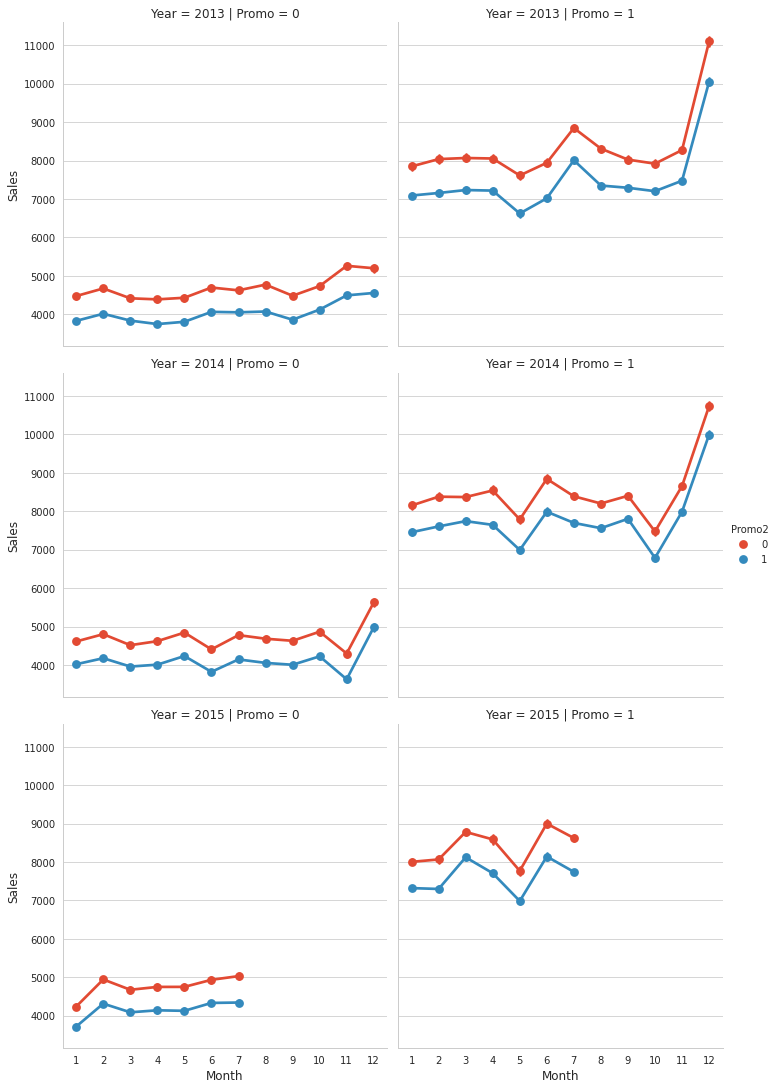

In [ ]:
sns.factorplot(data = df, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
             )
# So, of course, if the stores are having promotion the sells are higher.
# Overall the store promotions sellings are also higher than the seasionality promotions (Promo2). However I can't see no yearly trend. 

**As We can see that when the promo is running Sales are high**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


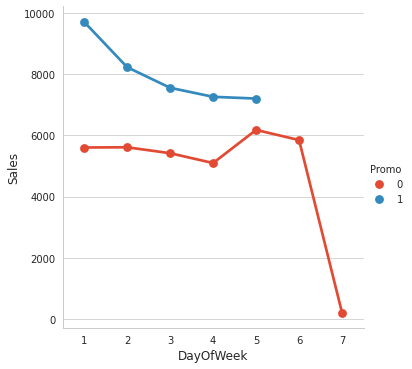

In [ ]:
sns.factorplot(data = df, x = "DayOfWeek", y = "Sales", hue = "Promo")

In [ ]:
print("""So, no promotion in the weekend. However, the sales are very high, if the stores have promotion. 
The Sales are going crazy on Sunday. No wonder.""")
print("There are", df[(df.Open == 1) & (df.DayOfWeek == 7)].Store.unique().shape[0], "stores opend on sundays")    

So, no promotion in the weekend. However, the sales are very high, if the stores have promotion. 
The Sales are going crazy on Sunday. No wonder.
There are 33 stores opend on sundays


**Let's see the trends on a yearly basis.**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


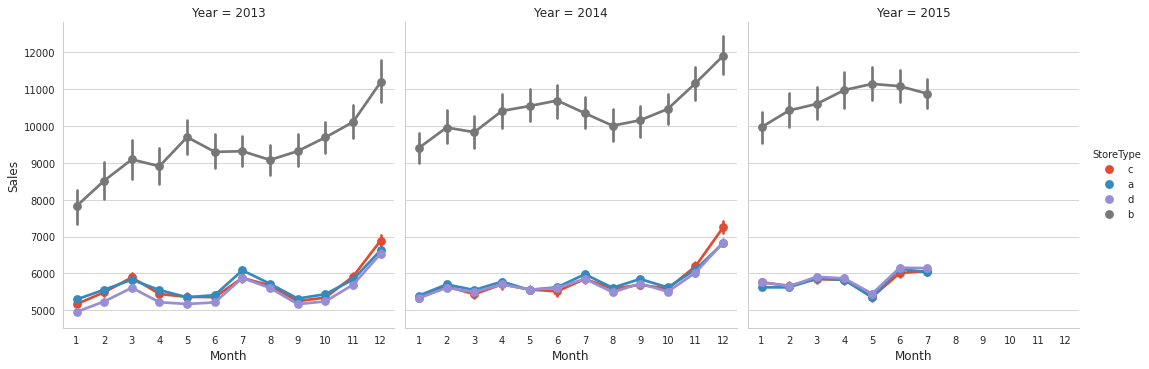

In [ ]:
sns.factorplot(data = df, x = "Month", y = "Sales", col = "Year", hue = "StoreType")
# Yes, we can see a seasonalities, but not trends. The sales stays constantly yearly. 

**What about the Competition Distance. What kind of inpact does this have on the sales.**

In [ ]:
df.CompetitionDistance.describe()
# The obsverations are continous numbers, so we need to convert them into a categories. Lets a create a new variable.
df["CompetitionDistance_Cat"] = pd.cut(df["CompetitionDistance"], 5)

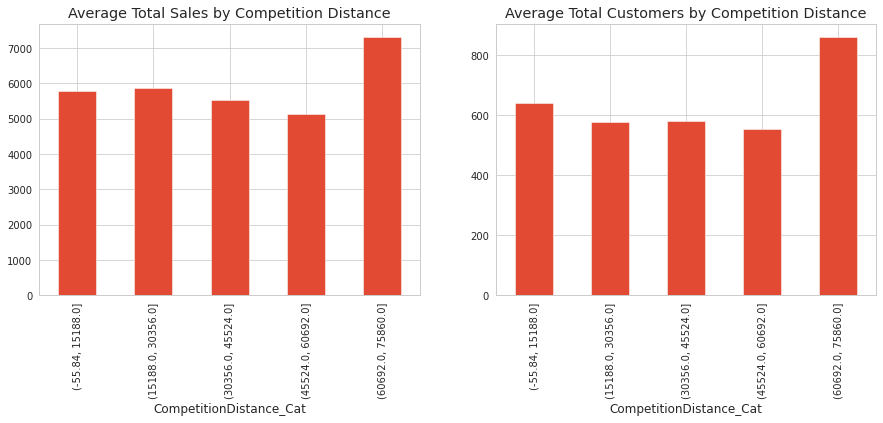

In [ ]:
f, ax = plt.subplots(1,2, figsize = (15,5))

df.groupby(by = "CompetitionDistance_Cat").Sales.mean().plot(kind = "bar", title = "Average Total Sales by Competition Distance", ax = ax[0])
df.groupby(by = "CompetitionDistance_Cat").Customers.mean().plot(kind = "bar", title = "Average Total Customers by Competition Distance", ax = ax[1])

# It is pretty clear. If the competions is very far away, the stores are performing better (sales and customers)

In [ ]:
df.drop(['Avg_Customer_Sales','CompetitionDistance_Cat'],axis=1,inplace=True)

**Box plot shows that we have a very high outliers in sales**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


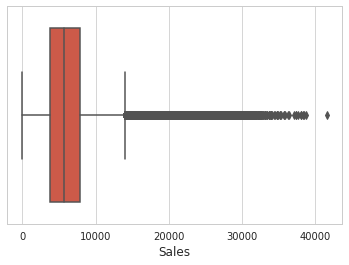

In [ ]:
#checking outliers in sales
sns.boxplot(rossman_df['Sales'])

**Removing Outliers Of Sales Column**

In [ ]:
#removing outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
# defining new variable after removing outliers
df= remove_outlier(df, 'Sales')

# **Conclusion of the analysis:**
 
**Sales are highly correlated to number of Customers.**
 
**The most selling and crowded store type is A.**
 
**StoreType B has the lowest Average Sales per Customer. So i think customers visit this type only for small things.**
 
**StoreTybe D had the highest buyer cart.**
 
**Promo runs only in weekdays.**
 
**For all stores, Promotion leads to increase in Sales and Customers both.**
 
**More stores are opened during School holidays than State holidays.**
 
**The stores which are opened during School Holiday have more sales than normal days.**
 
**Sales are increased during Chirstmas week, this might be due to the fact that people buy more beauty products during a Christmas celebration.**
 
**Promo2 doesnt seems to be correlated to any significant change in the sales amount.**
 
**Absence of values in features CompetitionOpenSinceYear/Month doesn’t indicate the absence of competition as CompetitionDistance values are not null where the other two values are null.**

### **Drop Subsets Of Data Where Might Cause Bias**

In [ ]:
# where stores are closed, they won't generate sales, so we will remove that part of the dataset
df = df[df.Open != 0]

In [ ]:
# Open isn't a variable anymore, so we'll drop it too
df = df.drop('Open', axis=1)

In [ ]:
# Check if there's any opened store with zero sales
df[df.Sales == 0]['Store'].sum()

31460

In [ ]:
# see the percentage of open stored with zero sales
df[df.Sales == 0]['Sales'].sum()/df.Sales.sum()

0.0

In [ ]:
# remove this part of data to avoid bias
df = df[df.Sales != 0]

In [ ]:
df_new=df.copy()

In [ ]:
df_new = pd.get_dummies(df_new,columns=['StoreType','Assortment'])

In [ ]:
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,1,2015,7,31,31,1270.0,0,0,0,1,0,1,0,0
1,2,5,2015-07-31,6064,625,1,1,2015,7,31,31,570.0,1,1,0,0,0,1,0,0
2,3,5,2015-07-31,8314,821,1,1,2015,7,31,31,14130.0,1,1,0,0,0,1,0,0
3,4,5,2015-07-31,13995,1498,1,1,2015,7,31,31,620.0,0,0,0,1,0,0,0,1
4,5,5,2015-07-31,4822,559,1,1,2015,7,31,31,29910.0,0,1,0,0,0,1,0,0


**From plot it can be sen that most of the sales have been on 1st and last day of week**

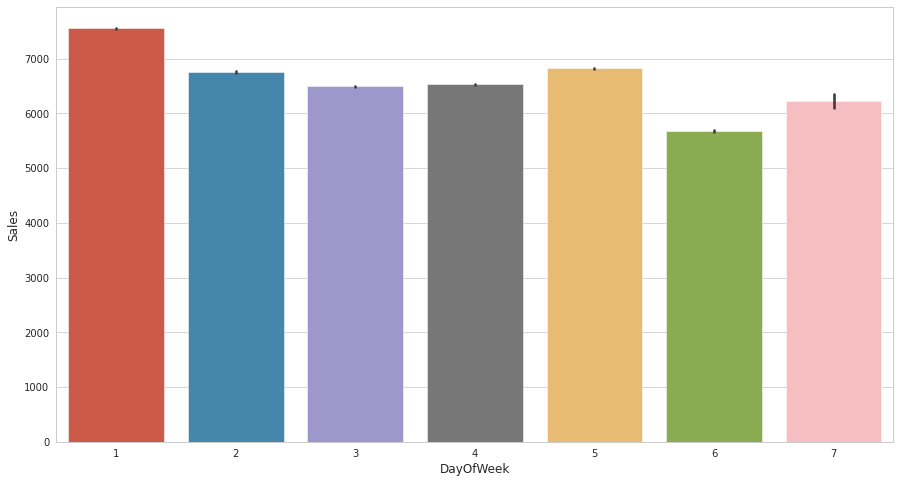

In [ ]:
#plot for sales in terms of days ofthe week
plt.figure(figsize=(15,8))
sns.barplot(x='DayOfWeek', y='Sales' ,data=df_new); 

#### **Setting Features and Target Variables**

In [ ]:
X = df_new.drop(['Sales','Store','Date','Year'] , axis = 1)
y= df_new.Sales

In [ ]:
X.shape

(817644, 16)

In [ ]:
X.head()

,DayOfWeek,Customers,Promo,SchoolHoliday,Month,Day,WeekOfYear,CompetitionDistance,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,5,555,1,1,7,31,31,1270.0,0,0,0,1,0,1,0,0
1,5,625,1,1,7,31,31,570.0,1,1,0,0,0,1,0,0
2,5,821,1,1,7,31,31,14130.0,1,1,0,0,0,1,0,0
3,5,1498,1,1,7,31,31,620.0,0,0,0,1,0,0,0,1
4,5,559,1,1,7,31,31,29910.0,0,1,0,0,0,1,0,0


In [ ]:
y.head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

#### **Splitting Dataset Into Training Set and Test Set**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [ ]:
columns=X_train.columns

## **Implementing Supervised Machine Learning algorithms.**

## **1.  Linear Regression (OLS)**

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regressor.intercept_

-1507.4417985699683

In [ ]:
regressor.coef_

array([-1.30381346e+02,  3.06863041e+04,  1.09386001e+03,  2.29418388e+01,
        3.54223020e+02,  3.82831239e+01, -1.58021936e+02,  1.82430640e+03,
        3.10732033e+02,  3.18132398e+02, -1.90167603e+03,  1.67419398e+02,
        1.41612423e+03,  1.44688318e+03, -3.17950648e+03,  1.73262330e+03])

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred)

1329406.2402058856

In [ ]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

1152.998803210951

In [ ]:
train_score_1=regressor.score(X_train,y_train)
train_score_1

0.7807496727472854

In [ ]:
test_score_1=regressor.score(X_test,y_test)
test_score_1

0.7823919595957616

In [ ]:
#storing 100 observations for analysis
simple_lr_pred = y_pred[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred}) #storing these values into dataframe

In [ ]:
#storing absolute diffrences between actual sales price and predicted
dataset_lr['diff']=(dataset_lr['Real']-dataset_lr['PredictedLR']).abs()

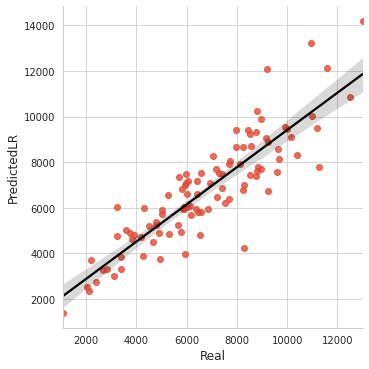

In [ ]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'});

## **Inferences On Linear Regression Coefficients**

In [ ]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                 2.086e+05
Date:                Sat, 24 Jul 2021   Prob (F-statistic):               0.00
Time:                        12:12:12   Log-Likelihood:            -6.9257e+06
No. Observations:              817644   AIC:                         1.385e+07
Df Residuals:                  817629   BIC:                         1.385e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -993.1075      5.669   -175.169      0.000   -1004.219    -981.996
DayOfWeek             -21.0704      0.785    -26.837      0.000     -22.609     -19.532
Customers               7.2260      0.005   1471.966      0.000       7.216       7.236
Promo                1093.4894      2.768    395.028      0.000    1088.064    1098.915
SchoolHoliday          27.2192      3.326      8.183      0.000      20.700      33.738
Month                  33.1415      1.433     23.134      0.000      30.334      35.949
Day                     1.2777      0.152      8.418      0.000       0.980       1.575
WeekOfYear             -3.3867      0.330    -10.267      0.000      -4.033      -2.740
CompetitionDistance     0.0240      0.000    140.522      0.000       0.024       0.024
Promo2                307.7765      2.662    115.635      0.000     302.560     312.993
StoreType_a            66.5792      4.780     13.929      0.000      57.211      75.948
StoreType_b         -2140.7862     12.728   -168.195      0.000   -2165.733   -2115.840
StoreType_c           -81.9285      5.313    -15.419      0.000     -92.342     -71.514
StoreType_d          1163.0279      5.024    231.517      0.000    1153.182    1172.874
Assortment_a         1114.6637      6.456    172.654      0.000    1102.010    1127.317
Assortment_b        -3510.5496     15.385   -228.183      0.000   -3540.703   -3480.396
Assortment_c         1402.7783      6.642    211.194      0.000    1389.760    1415.797
==============================================================================
Omnibus:                    49108.747   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           145480.294
Skew:                           0.301   Prob(JB):                         0.00
Kurtosis:                       4.977   Cond. No.                     8.09e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.15e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## **2. LARS Lasso Regression**

In [ ]:
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
lasreg = las.fit(X_train, y_train)

In [ ]:
def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100

train_score_2=lasreg.score(X_train, y_train)
test_score_2=lasreg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_2 , "," ,
      "Out of Sample Test Score" ,":" , test_score_2)

y_predicted = lasreg.predict(X_train)
y_test_predicted = lasreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.7807308911324253 , Out of Sample Test Score : 0.7823685232825738
Training RMSE : 1155.07694652747 Testing RMSE : 1153.0608903320885
Training MAPE : 14.215633319957089 Testing MAPE : 14.233294529232749


## **3. Decision Tree Regression**

In [ ]:
tree = DecisionTreeRegressor()
treereg = tree.fit(X_train, y_train)

In [ ]:
train_score_3=treereg.score(X_train, y_train)
test_score_3=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_3 , "," ,
      "Test Score" ,":" , test_score_3)

y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.9999957301266714 , Test Score : 0.915698294979686
Training RMSE : 5.097176662035323 Testing RMSE : 717.6448402187685
Training MAPE : 0.0010365300881590655 Testing MAPE : 7.644289201197331


### **Decision Tree With Hyper Parameter Tuning**

In [ ]:
# #another script that takes toooo long, to find the right parameters for tree
# tree = DecisionTreeRegressor()

# params = {
#          'min_samples_split':[2,3,5,7],
#          'min_samples_leaf':[6,8,10],
#          }

# grid = RandomizedSearchCV(estimator=rfr,param_distributions=params,verbose=True,cv=10)
# #choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.

# grid.fit(X_train, y_train)
# grid.best_params_

 **I trained Model with hyper parameters..to not run everytime i record the result**

**Here are our best parameters for Decision Tree**

**{ min_samples_split=5,min_samples_leaf=8 }**

In [ ]:
tree = DecisionTreeRegressor(min_samples_leaf=8,min_samples_split=5)
treereg = tree.fit(X_train, y_train)

In [ ]:
train_score_4=treereg.score(X_train, y_train)
test_score_4=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_4 , "," ,
      "Test Score" ,":" , test_score_4)

y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.9635058030756847 , Test Score : 0.9354148263684149
Training RMSE : 471.23126375479194 Testing RMSE : 628.1419569341066
Training MAPE : 5.025363296230848 Testing MAPE : 6.691541369712414


In [ ]:
#storing 100 observations for analysis
dc_pred = y_test_predicted[:100]
dc_real = y_test[:100]
dataset_dc = pd.DataFrame({'Real':dc_real,'PredictedDC':dc_pred}) #storing these values into dataframe

In [ ]:
#storing absolute diffrences between actual sales price and predicted
dataset_dc['diff']=(dataset_dc['Real']-dataset_dc['PredictedDC']).abs()

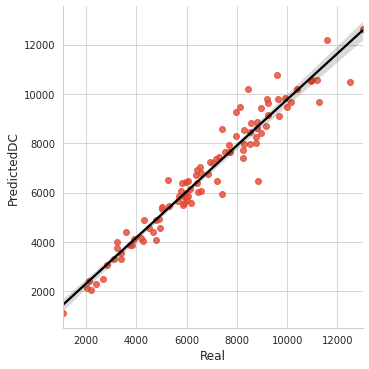

In [ ]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedDC', data=dataset_dc, line_kws={'color': 'black'});

# **4. Support Vector Regression**

In [ ]:
#%%time
#from sklearn.svm import SVR
#svr=SVR()
#svr_reg=svr.fit(X_train,y_train)
#svr

In [ ]:
#print("Regresion Model Score" , ":" , svr_reg.score(X_train, y_train) , "," ,
#      "Out of Sample Test Score" ,":" , svr_reg.score(X_test, y_test))

#y_predicted = svr_reg.predict(X_train)
#y_test_predicted = svr_reg.predict(X_test)

#print("Training RMSE", ":", rmse(y_train, y_predicted),
#      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
#print("Training MAPE", ":", mape(y_train, y_predicted),
#      "Testing MAPE", ":", mape(y_test, y_test_predicted))

## **5. K-Nearest Neighbors Regression**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 30)
knnreg = knn.fit(X_train, y_train)

In [ ]:
print("Regresion Model Score" , ":" , knnreg.score(X_train, y_train) , "," ,
      "Out of Sample Test Score" ,":" , knnreg.score(X_test, y_test))

y_predicted = knnreg.predict(X_train)
y_test_predicted = knnreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.7372269072053158 , Out of Sample Test Score : 0.7166571879424091
Training RMSE : 1264.481956770611 Testing RMSE : 1315.6715612729529
Training MAPE : 16.24446434689304 Testing MAPE : 16.928428324187294


### **6. Random Forest With Hyper Parameter Tuning**

In [ ]:
# #another script that takes toooo long, to find the right parameters for RFR
# rfr=RandomForestRegressor(n_jobs=-1)

# params = {
#          'n_estimators':[40,50,60,70,80,90],
#          'min_samples_split':[2,3,6,8],
#          'min_samples_leaf':[1,2,3,4],
#          'max_depth':[None,5,15,30]
#          }

# #the dimensionality is high, the number of combinations we have to search is enormous, using RandomizedSearchCV is a better option then GridSearchCV
# grid = RandomizedSearchCV(estimator=rfr,param_distributions=params,verbose=True,cv=10)

# #choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.
# grid.fit(X_train, y_train)
# grid.best_params_

 **I trained Model with hyper parameters..to not run everytime i record the result**

**Here are our best parameters for Random Forest**

**{ n_estimators=80,min_samples_split=2,min_samples_leaf=1,max_depth=None }**

In [ ]:
#%%time
rdf = RandomForestRegressor(n_estimators=80,min_samples_split=2, min_samples_leaf=1,max_depth=None,n_jobs=-1)
rdfreg = rdf.fit(X_train, y_train)

In [ ]:
train_score_5=rdfreg.score(X_train, y_train)
test_score_5=rdfreg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_5 , "," ,
      "Test Score" ,":" , test_score_5)   

y_predicted_2 = rdfreg.predict(X_train)
y_test_predicted_2 = rdfreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted_2),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted_2))
print("Training MAPE", ":", mape(y_train, y_predicted_2),
      "Testing MAPE", ":", mape(y_test, y_test_predicted_2))

Regresion Model Score : 0.9938106274952453 , Test Score : 0.9564330395686252
Training RMSE : 194.06423337758446 Testing RMSE : 515.9053339718304
Training MAPE : 2.1106287800993595 Testing MAPE : 5.658571918142949


In [ ]:
y_test_predicted_2

array([8253.1125, 6122.775 , 8365.4   , ..., 6483.2125, 6200.9625,
       4530.55  ])

In [ ]:
#storing 100 observations for analysis
rf_prd = y_test_predicted_2[:100]
rf_real = y_test[:100]
dataset_rf = pd.DataFrame({'Real':rf_real,'PredictedRF':rf_prd})

In [ ]:
#storing absolute diffrences between actual sales price and predicted
dataset_rf['diff']=(dataset_rf['Real']-dataset_rf['PredictedRF']).abs()

In [ ]:
 # taking 4 sample
dataset_rf.sample(4)

,Real,PredictedRF,diff
699921,5819,6122.7750,303.7750
801725,6528,6833.3625,305.3625
958631,6065,6540.2875,475.2875
384625,8749,8140.0375,608.9625


In [ ]:
#Statistical description of our predictions and actual values 
dataset_rf.describe()

,Real,PredictedRF,diff
count,100.000000,100.000000,100.000000
mean,6775.070000,6734.710500,378.160500
std,2534.335345,2436.747920,373.075289
min,1072.000000,1112.487500,2.450000
25%,5004.750000,5276.721875,156.525000
50%,6548.000000,6547.081250,264.581250
75%,8598.250000,8488.415625,482.284375
max,13001.000000,12620.837500,2160.787500


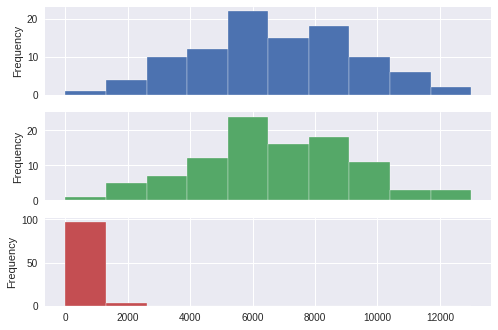

In [ ]:
#plotting the actual,predicted & difference of SALES
plt.style.use('seaborn')
dataset_rf.plot.hist(subplots=True, legend=False);

**As we can see that Actual, Prediction values are approximately closed to each other and there is no such significant variation in our plots.**

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


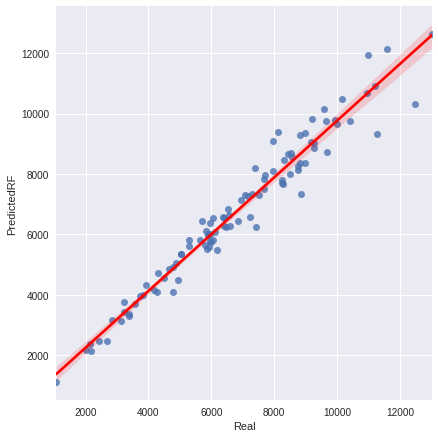

In [ ]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedRF', data=dataset_rf, line_kws={'color': 'red'}, size=6, aspect=1);

## **Feature Importance On Random Forest Regressor**

As we can see that Random Forest has the highest test score

In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

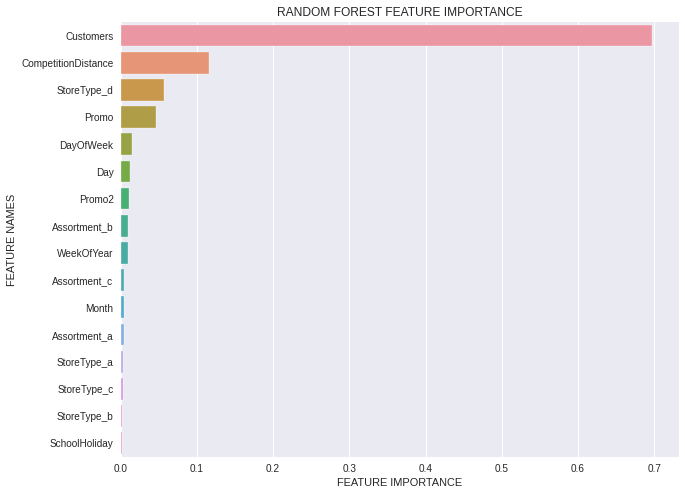

In [ ]:
plot_feature_importance(rdfreg.feature_importances_,columns[:],'RANDOM FOREST')

**Customers, CompetitionDistance, StoreType_d, Promo these four are most important features in our sales prediction.**

In [ ]:
score_df = pd.DataFrame({'Train_Score':[train_score_1,train_score_2,train_score_3,train_score_4,train_score_5],'Test_Score':[test_score_1,test_score_2,test_score_3,test_score_4,test_score_5]},index=['Linear Regression','Lasso Regression','Decision Tree',"Decision Tree(hyperparameters)",'Random Forest Regression'])

# **Conclusion**

In [ ]:
score_df

,Train_Score,Test_Score
Linear Regression,0.780750,0.782392
Lasso Regression,0.780731,0.782369
Decision Tree,0.999996,0.915698
Decision Tree(hyperparameters),0.963506,0.935415
Random Forest Regression,0.993811,0.956433


**Random Forest regressor achieved lowest MAPE as 5.65% showing that it is a highly accurate model. MAE is the average magnitude of error produced by your model, the MAPE is how far the model’s predictions are off from their corresponding outputs on average**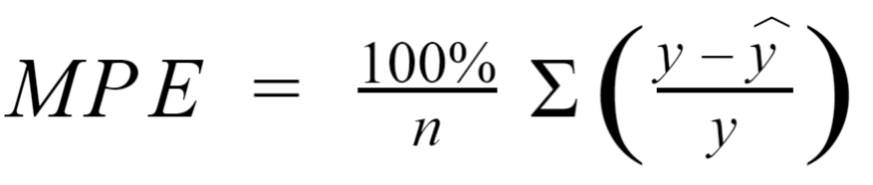